In [3]:
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
javaServlet_client1_wallTime = [60.348, 101.361, 140.47]
javaServlet_client1_throughput = [1657.0557433552065, 1973.1454898826964, 2135.687335374101]
goServlet_client1_wallTime = [40.503, 47.885, 54.317]
goServlet_client1_throughput = [2468.9529170678716, 4176.673279732693, 5523.132720879283]

javaServlet_client2_wallTime = [58.686, 102.164, 143.219]
javaServlet_client2_throughput = [1703.9839143918482, 1957.6367409263537, 2094.6941397440287]
goServlet_client2_wallTime = [42.649, 48.698, 57.302]
goServlet_client2_throughput = [2344.7208609815, 4106.944843730748, 5235.419357090503]

In [70]:
def createPlot(go, java, path):
    x_axis = ['1','2','3']
    fig, ax = plt.subplots(tight_layout=True)
    ax.plot(x_axis, go, color='red', label='Go Servlet')
    ax.plot(x_axis, java, color='blue', label='Java Servlet')
    ax.set_xlabel('Configuration')
    ax.set_ylabel('Average Throughput')
    ax.set_title('Average Throughput with Different Configurations')
    ax.legend()
    fig.savefig(path, bbox_inches='tight')

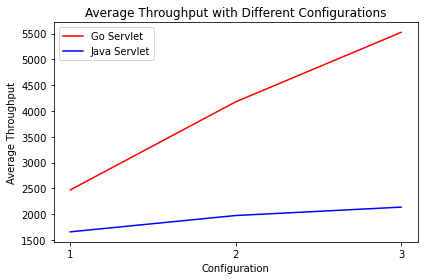

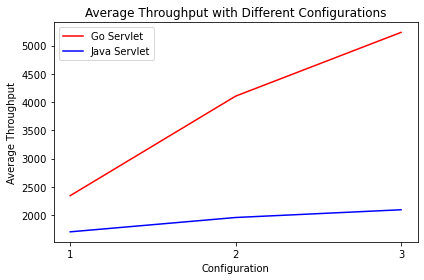

In [71]:
createPlot(goServlet_client1_throughput, javaServlet_client1_throughput, './part3.jpeg')
createPlot(goServlet_client2_throughput, javaServlet_client2_throughput, './part5.jpeg')

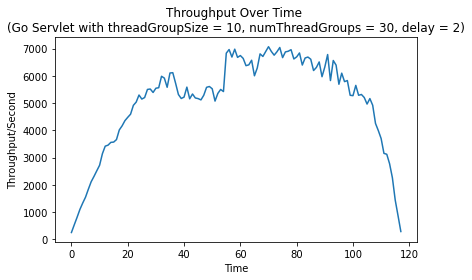

In [59]:
records_path = "/Users/sunny/Downloads/resources.csv"
records = pd.read_csv(records_path, header=None)
startTime = records[0] + records[1]
startTime = startTime.apply(lambda x: int(x/1000))
throughput = startTime.value_counts()
throughput_timesorted = throughput.sort_index()
timestamps = throughput_timesorted.index.to_numpy()
initial_time = timestamps[0]
timestamps = [time - initial_time for time in timestamps]
values = throughput_timesorted.to_numpy()
fig, ax = plt.subplots(tight_layout=True)
ax.plot(timestamps, values)
ax.set_xlabel('Time')
ax.set_ylabel('Throughput/Second')
ax.set_title('Throughput Over Time \n(Go Servlet with threadGroupSize = 10, numThreadGroups = 30, delay = 2)')
fig.savefig("./part6.jpeg", bbox_inches='tight')